KMeans(n_clusters=3, random_state=42)


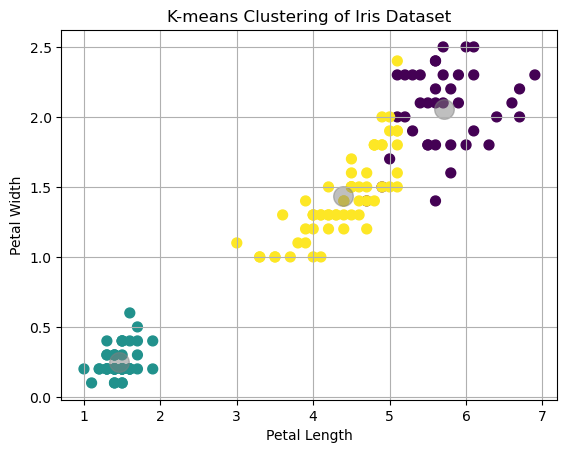

In [2]:
# K-means Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# Load the Iris dataset
dataset = load_iris()
# fit a Kmeans model to the data
model = KMeans(n_clusters=3, random_state=42)
model.fit(dataset.data)
print(model)

# Visualize the results
X = dataset.data
y_kmeans = model.predict(X)
# Scatter plot the petal length and petal width
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='grey', s=200, alpha=0.5)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid()
plt.show()


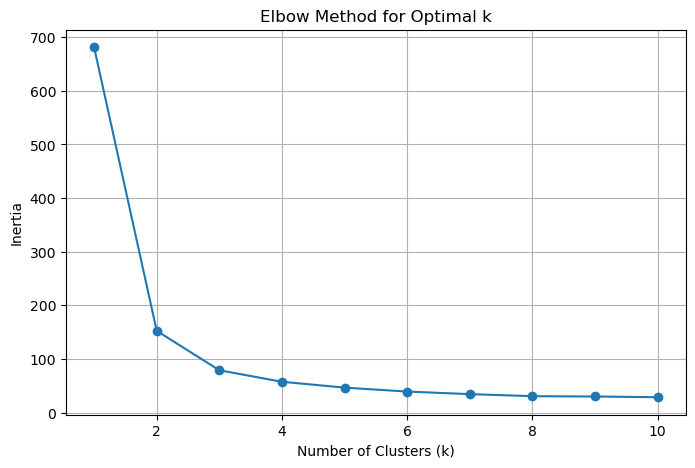

In [3]:
# choosing n_clusters using the elbow method
inertia = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [4]:
# Using Elbow method to choose n_cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [5]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 4.542470666666664
2 : 1.01565301173572
3 : 0.5257044388398484
4 : 0.3823392014196983
5 : 0.3098148677248678
6 : 0.2604402356902358
7 : 0.22870543530543538
8 : 0.2031748196248197
9 : 0.19937497772758653


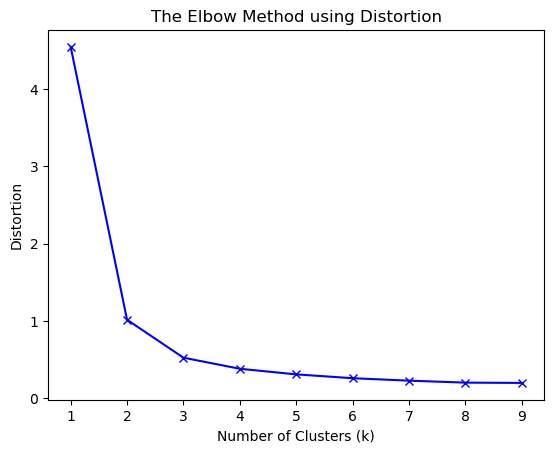

In [6]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 681.3706
2 : 152.3479517603579
3 : 78.8556658259773
4 : 57.35088021295475
5 : 46.472230158730156
6 : 39.066035353535355
7 : 34.3058152958153
8 : 30.476222943722945
9 : 29.906246659137967


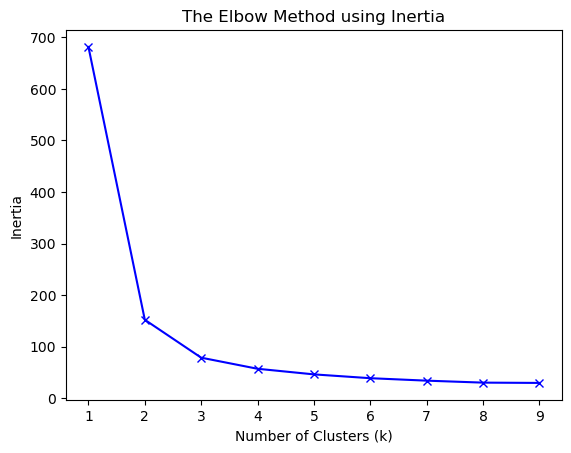

In [7]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

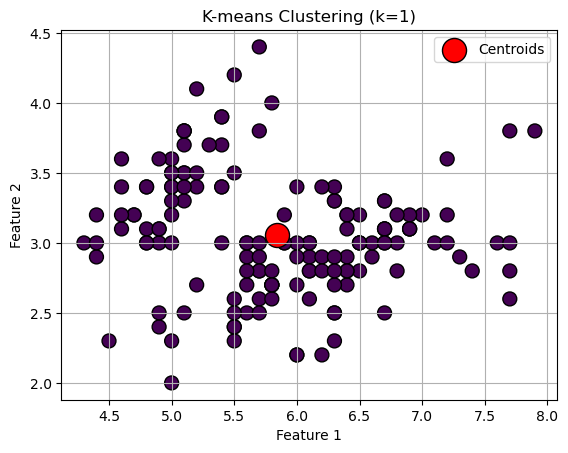

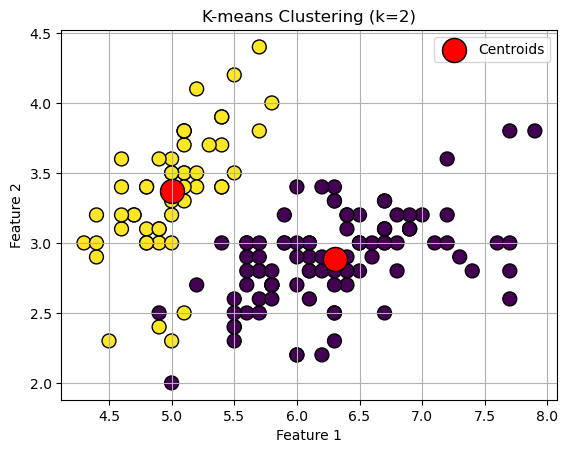

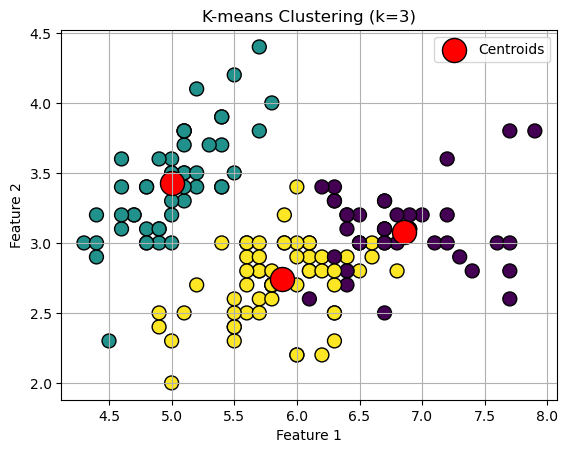

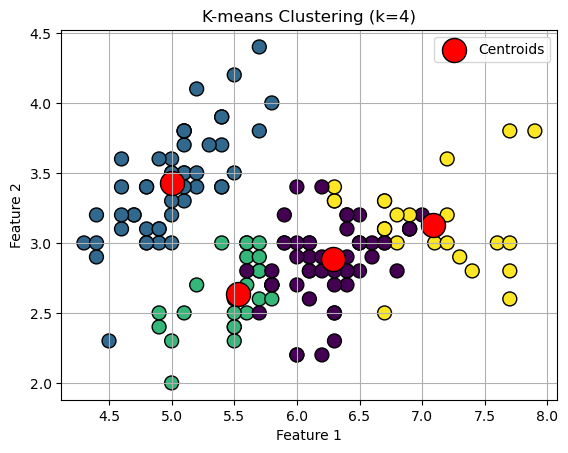

In [8]:
k_range = range(1, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# silhouette


In [9]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score

X = dataset.data

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric = "euclidean")
    print(f"for n_clusters={n_clusters}, silhouette score is {sil_coeff:.4f}")
# 

for n_clusters=2, silhouette score is 0.6810
for n_clusters=3, silhouette score is 0.5512
for n_clusters=4, silhouette score is 0.4976
for n_clusters=5, silhouette score is 0.4931
for n_clusters=6, silhouette score is 0.3678
for n_clusters=7, silhouette score is 0.3543
for n_clusters=8, silhouette score is 0.3447
for n_clusters=9, silhouette score is 0.3156
for n_clusters=10, silhouette score is 0.3014


# Anomaly Detection using k-means

KMeans(n_clusters=1)


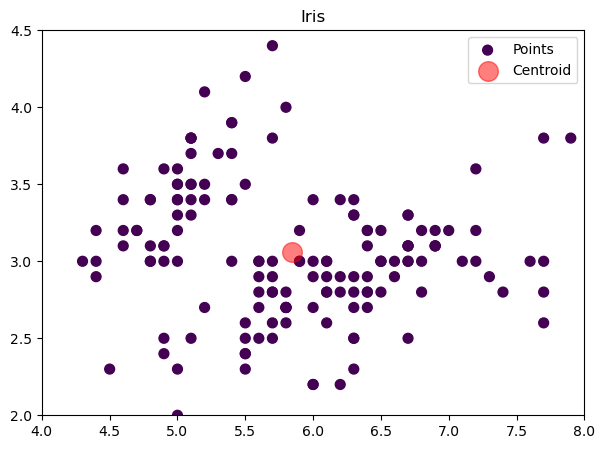

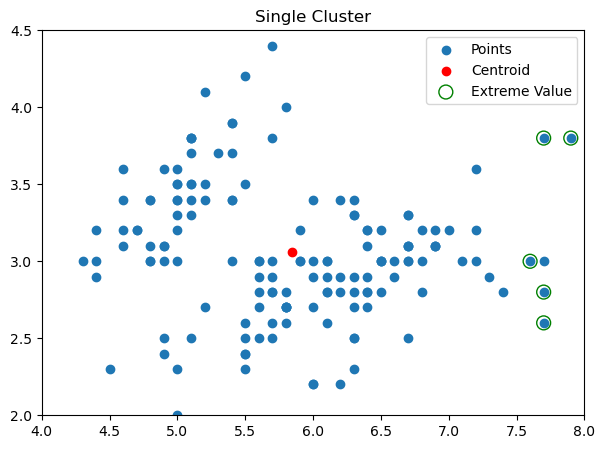

[[7.7 2.6 6.9 2.3]
 [7.7 3.8 6.7 2.2]
 [7.7 2.8 6.7 2. ]
 [7.9 3.8 6.4 2. ]
 [7.6 3.  6.6 2.1]]


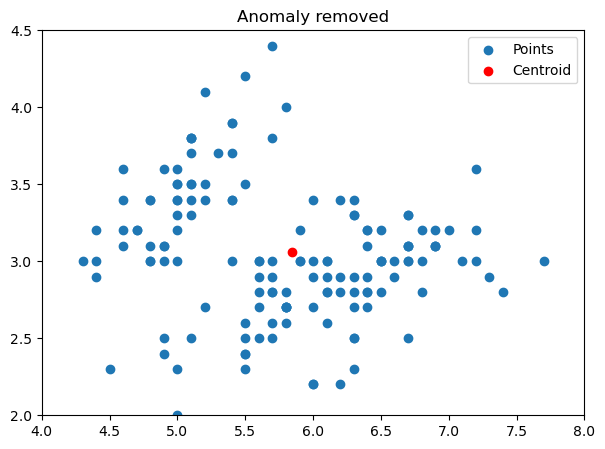

In [14]:
# Anomaly Detection using K-means
cluster = 1
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
# generate the data
# X, label = make_blobs(100, centers = cluster)
# get the K-means model
kmeans = KMeans(n_clusters=cluster)
kmeans.fit(X)
print(kmeans)
# Visualize the results
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(X)
# scatter plot the data points
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title('Iris')
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis',label='Points')
# show centroid centres as red circle opacity 50%
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Centroid')
plt.xlim(4, 8)
plt.ylim(2, 4.5)
ax.legend()
plt.show()

# identify the 5 closest points
# argsort returns an array of indexes which will sort the array in
# ascending order
# so we reverse it via [::-1] and take the top five with [:5]
distances = kmeans.transform(X)
sorted_idx = np.argsort(distances.ravel())[::-1][:5]
# Now let's see which are the top 5 points furthest away
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0],
centers[:, 1],
label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
label='Extreme Value', edgecolors='g',
facecolors='none', s=100)
ax.legend(loc='best')
plt.xlim(4, 8)
plt.ylim(2, 4.5)
plt.show()
# It's easy to remove these points if we like:
new_X = np.delete(X, sorted_idx, axis=0)
# Or to extract the anomalies
anomaly_X = X[sorted_idx,:]
print(anomaly_X)

# Visualize the points with anomalies removed
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Anomaly removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0],
centers[:, 1],
label='Centroid', color='r')

ax.legend(loc='best')
plt.xlim(4, 8)
plt.ylim(2, 4.5)
plt.show()

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign each point to a cluster and compute distance to its centroid
labels = kmeans.labels_
distances = np.min(kmeans.transform(X), axis=1)  # Distance to assigned centroid

# Create a DataFrame for easy manipulation
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels
df['Distance_to_Centroid'] = distances

# Find the top 3 anomalies (largest distances)
top_anomalies = df.nlargest(3, 'Distance_to_Centroid')
print("Top 3 anomalies:")
print(top_anomalies)

# Remove the top 3 anomalies from the dataset
df_cleaned = df.drop(top_anomalies.index)
print("\nDataset shape after removing top 3 anomalies:", df_cleaned.shape)


Top 3 anomalies:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
98                 5.1               2.5                3.0               1.1   
57                 4.9               2.4                3.3               1.0   
118                7.7               2.6                6.9               2.3   

     Cluster  Distance_to_Centroid  
98         2              1.646801  
57         2              1.567598  
118        0              1.551560  

Dataset shape after removing top 3 anomalies: (147, 6)


# Principal Component Analysis

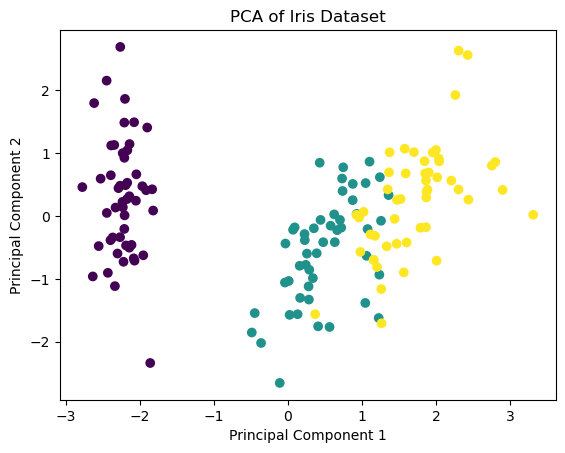

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Data Scaling
x_scaled = StandardScaler().fit_transform(X)

# Apply PCA with two components (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [11]:
# Magic line to make your 3-d graph pop out,
# and you can interactively rotate it.
%matplotlib tk



In [12]:
# Set up the imports for 3-d plotting.
# Set up the imports for 3-d plotting.
from mpl_toolkits.mplot3d import Axes3D  # This import is important for 3D plotting
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
# Regular imports for PCA and the iris dataset.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
# Load iris dataset.
iris = load_iris()
X = iris.data
y = iris.target
# Data Scaling
x_scaled = StandardScaler().fit_transform(X)
# Apply PCA with three components (for 3d visualization)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_scaled)
# Plot the results in 3d.
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)
plt.title('PCA of Iris Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()